In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('googleplaystore.csv', sep=',')
df.head()
print(df.shape)

(10841, 13)


1. Leia o arquivo csv googleplaystore.csv e realize a seguinte atividades sobre o dataset utilizando as
bibliotecas Pandas e Matplotlib. Remova as linhas duplicadas

In [52]:
df = df.drop_duplicates(subset='App')
print(df.shape)

(9660, 13)


2. Faça um gráfico de barras contendo os top 5 apps por número de instalação.

In [53]:
# Verificar se a coluna 'Installs' contém valores como 'Free'
is_free = df['Installs'] == 'Free'

# Apenas se `is_free` encontrar alguma linha
if not df[is_free].empty:
    # Converter a coluna 'Installs' para object 
    df['Installs'] = df['Installs'].astype(object)
    
    # Corrigir as colunas desalinhadas
    df.loc[is_free,'Android Ver'] = df.loc[is_free, 'Current Ver']
    df.loc[is_free, 'Current Ver'] = df.loc[is_free,'Last Updated']
    df.loc[is_free,'Last Updated'] = df.loc[is_free,'Genres']
    df.loc[is_free,'Genres'] = df.loc[is_free,'Content Rating']
    df.loc[is_free,'Content Rating'] = df.loc[is_free,'Price']
    df.loc[is_free,'Price'] = df.loc[is_free,'Type']
    df.loc[is_free, 'Type'] = df.loc[is_free, 'Installs'].astype(str)  
    df.loc[is_free, 'Installs'] = df.loc[is_free, 'Size'].astype(str)  
    df.loc[is_free, 'Size'] = df.loc[is_free, 'Reviews'].astype(str)  
    df.loc[is_free, 'Category'] = pd.NA  

    # Remover as vírgulas e o '+' e converter para valores numéricos
    df['Installs'] = df['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False)

    # Converter 'Installs' para valores numéricos
    df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

    # Substituir valores NaN por 0
    df['Installs'] = df['Installs'].fillna(0).astype(int)
else:
    print("Nenhuma linha encontrada onde 'Installs' é igual a 'Free'.")


                                App    Installs
2808                  Google Photos  1000000000
865               Google Play Games  1000000000
3117      Maps - Navigate & Explore  1000000000
391   Skype - free IM & video calls  1000000000
152               Google Play Books  1000000000


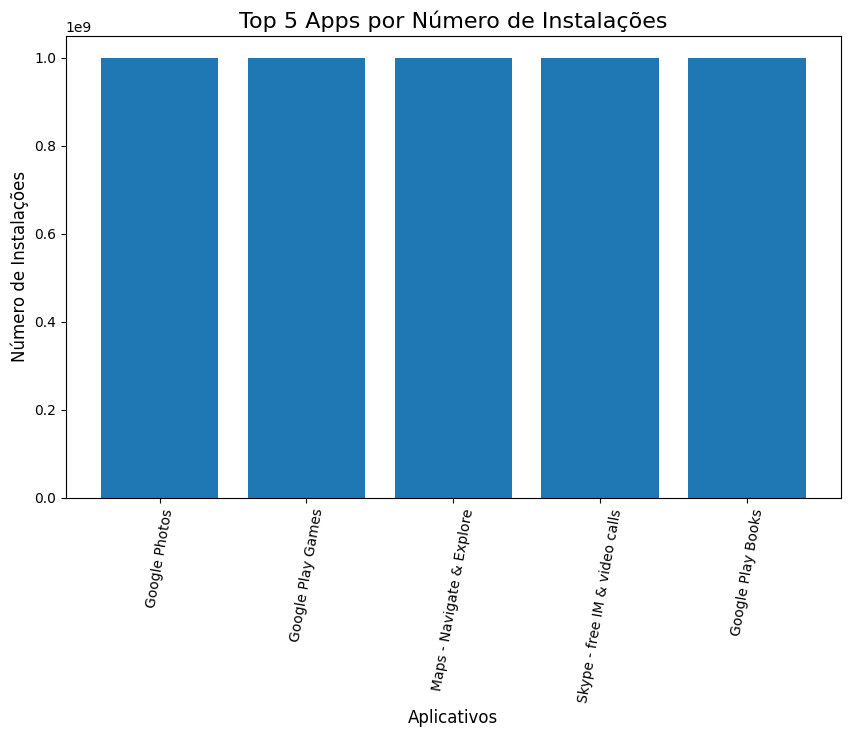

In [54]:
# Ordenar os aplicativos pela coluna 'Installs' em ordem decrescente e selecionar os 5 primeiros
top_apps = df.sort_values(by='Installs', ascending=False).head(5)

# Exibir os 5 melhores aplicativos com as colunas 'App' e 'Installs'
print(top_apps[['App', 'Installs']])

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_apps['App'], top_apps['Installs'])

# Adicionar título e rótulos
plt.title('Top 5 Apps por Número de Instalações', fontsize=16)
plt.xlabel('Aplicativos', fontsize=12)
plt.ylabel('Número de Instalações', fontsize=12)

# Rotacionar os nomes dos aplicativos para melhorar a visualização
plt.xticks(rotation=80)

# Mostrar o gráfico
plt.show()


3. Faça um gráfico de pizza (pie chart) mostrando as categorias de apps existentes no dataset de acordo com a frequência em que elas aparecem.


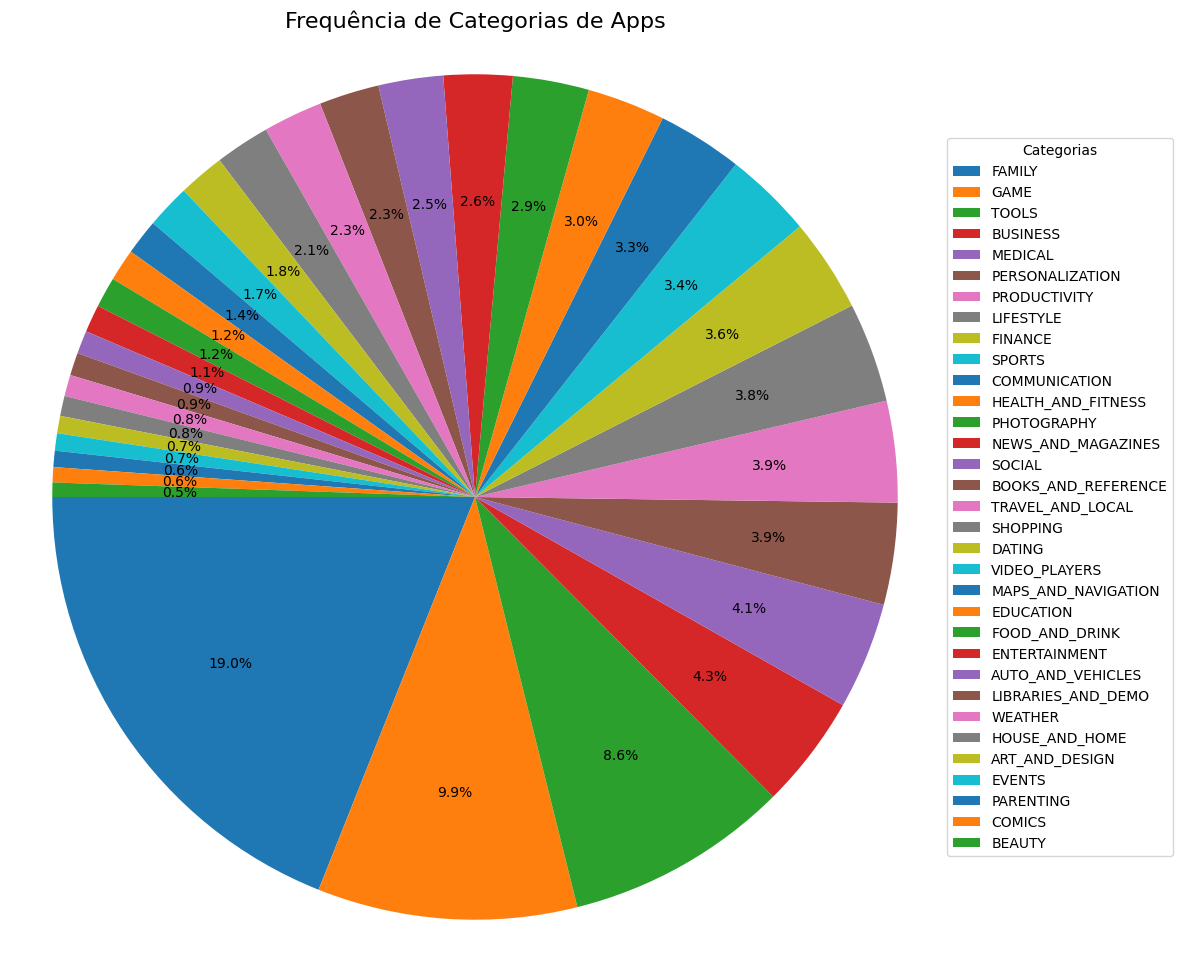

In [55]:
# 1. Contar a frequência de cada categoria
category_counts = df['Category'].value_counts()

# 2. Criar o gráfico de pizza
plt.figure(figsize=(12, 12))
plt.pie(category_counts, autopct='%1.1f%%', startangle=180, pctdistance=0.70, labels=None)

# 3. Adicionar título
plt.title('Frequência de Categorias de Apps', fontsize=16)
plt.legend(category_counts.index, title="Categorias", bbox_to_anchor=(1, 0.5), loc='center left')

# 4. Mostrar o gráfico
plt.axis('equal')  # Para garantir que o gráfico seja um círculo
plt.show()


4. Mostre qual o app mais caro existente no dataset.

In [56]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)  

mais_caro = df.nlargest(1, 'Price')

# Exibir o resultado
print(mais_caro[['App', 'Price']])


                           App  Price
4367  I'm Rich - Trump Edition  400.0


5. Mostre quantos apps são classificados como 'Mature 17÷'

In [57]:
classificacao = df[df['Content Rating'] == 'Mature 17+'].shape[0]
print(f"Número de aplicativos classificados como 'Mature 17+': {classificacao}")

Número de aplicativos classificados como 'Mature 17+': 393


6. Mostre o top 10 apps por número de reviews bem como o respectivo número de reviews. Ordene a lista de forma decrescente por número de reviews.

In [58]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

top_10 = df.nlargest(10, 'Reviews')
print(top_10[['App','Reviews']])

                                                    App     Reviews
2544                                           Facebook  78158306.0
336                                  WhatsApp Messenger  69119316.0
2545                                          Instagram  66577313.0
335            Messenger – Text and Video Chat for Free  56642847.0
1670                                     Clash of Clans  44891723.0
4005            Clean Master- Space Cleaner & Antivirus  42916526.0
1654                                     Subway Surfers  27722264.0
3665                                            YouTube  25655305.0
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999.0
1660                                       Clash Royale  23133508.0


7. Crie pelo menos mais 2 cálculos sobre o dataset e apresente um em formato de lista e outro em formato de valor. 

8. Crie pelo menos outras 2 formas gráficas de exibição dos indicadores acima utilizando a biblioteca Matplotlib.

7.1 Qual o gênero que mais aparece no DataFrame

In [64]:
# Agrupando por gênero e contando a quantidade de aplicativos
genero_contagem = df.groupby('Genres')['App'].count().reset_index(name='Contagem')

# Ordenando os resultados em ordem decrescente
genero_contagem = genero_contagem.sort_values('Contagem', ascending=False)

# Exibindo o gênero mais popular
print(genero_contagem.head(1))

    Genres  Contagem
107  Tools       826


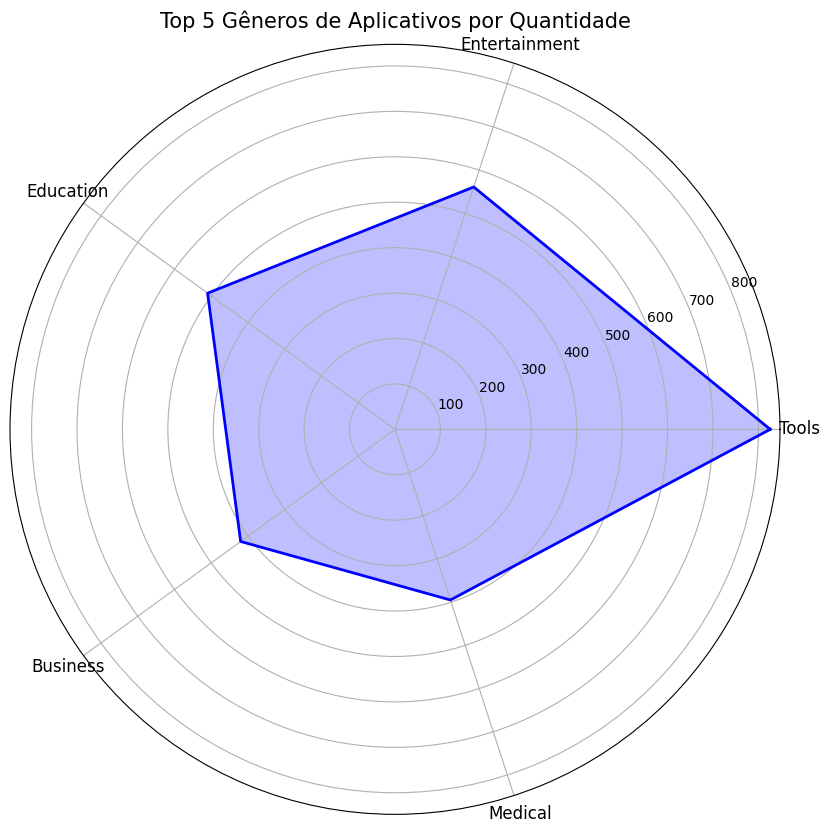

In [65]:
top_n = 5 
genero_contagem_top = genero_contagem.head(top_n)

# Configurações do gráfico de radar
labels = genero_contagem_top['Genres'].values  # Gêneros como rótulos
valores = genero_contagem_top['Contagem'].values  # Contagem de aplicativos
num_variaveis = len(labels)

# Calculando o ângulo de cada eixo no gráfico de radar
angulos = np.linspace(0, 2 * np.pi, num_variaveis, endpoint=False).tolist()

# Fechar o gráfico conectando o último ponto ao primeiro
valores = np.concatenate((valores, [valores[0]]))
angulos += angulos[:1]

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Desenhando o gráfico de radar
ax.fill(angulos, valores, color='blue', alpha=0.25)
ax.plot(angulos, valores, color='blue', linewidth=2)

# Adicionando os rótulos dos gêneros ao redor do gráfico
ax.set_xticks(angulos[:-1])
ax.set_xticklabels(labels, size=12)

# Adicionando o título
plt.title('Top 5 Gêneros de Aplicativos por Quantidade', size=15)

# Exibir o gráfico
plt.show()


7.2 Top 10 games mais baixados

In [61]:
top_game = df[df['Category'] == 'GAME']
top_installs = top_game.sort_values(by='Installs', ascending=False).head(10)
print(top_installs[['App','Category','Installs']])

                                                   App Category    Installs
1654                                    Subway Surfers     GAME  1000000000
1662                                               Pou     GAME   500000000
1722                                    My Talking Tom     GAME   500000000
1661                                      Temple Run 2     GAME   500000000
1655                                  Candy Crush Saga     GAME   500000000
1670                                    Clash of Clans     GAME   100000000
9166                      Modern Combat 5: eSports FPS     GAME   100000000
1699  Sniper 3D Gun Shooter: Free Shooting Games - FPS     GAME   100000000
1673                                           PAC-MAN     GAME   100000000
5950                                       Banana Kong     GAME   100000000


8.2 Top 10 game mais baixado

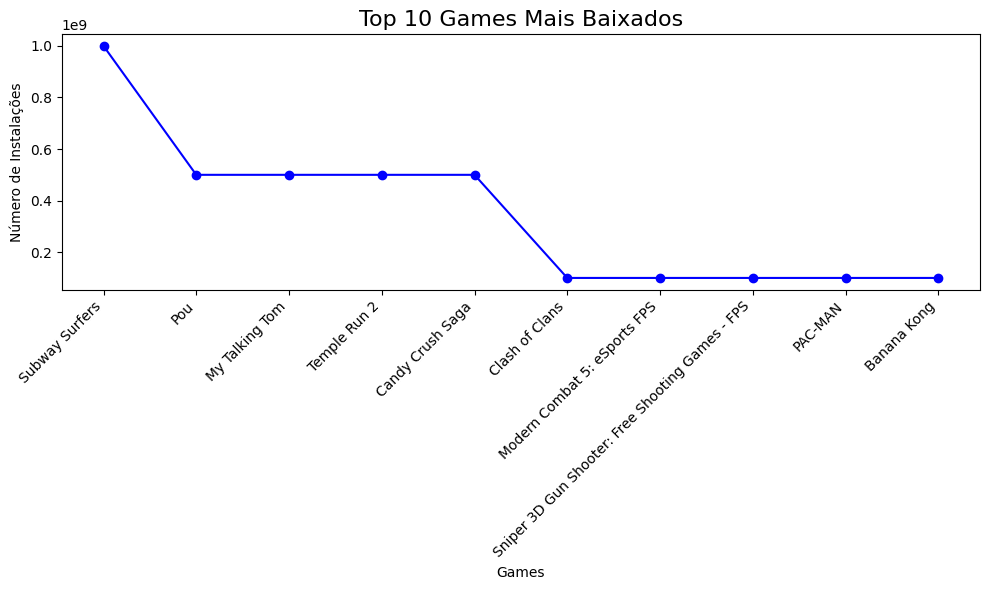

In [62]:
# Criando o gráfico de linhas
plt.figure(figsize=(10, 6))
plt.plot(top_installs['App'], top_installs['Installs'], marker='o', linestyle='-', color='b')

# Rotacionando os rótulos no eixo X para facilitar a leitura
plt.xticks(rotation=45, ha='right')

# Adicionando título e rótulos nos eixos
plt.title('Top 10 Games Mais Baixados', fontsize=16)
plt.xlabel('Games')
plt.ylabel('Número de Instalações')

# Exibindo o gráfico
plt.tight_layout()
plt.show()